# Курс Data Science
## Модуль 12.6 Домашняя работа

**Задание среднего уровня** Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
dataset = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
dataset.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [88]:
X = dataset[['CRIM', 'AGE', 'TAX', 'B', 'LSTAT']]
y = dataset['PRICE']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

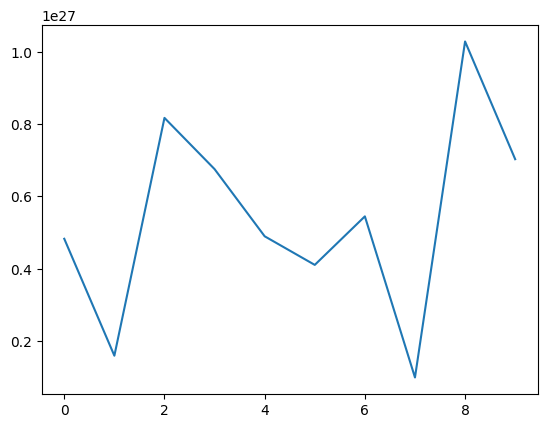

In [93]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.spatial import distance

sgd_regressor = SGDRegressor(learning_rate='constant', eta0=0.0001, fit_intercept=True, random_state=10)
w_current, epsilon = np.random.random(5), 0.0001
weight_evolution, mse_evolution = [], [] # изменения весов и ошибка на валидации
steps = range(10)
for step in steps:
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
    weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_))
    if weight_evolution[-1]<epsilon:
        print(f"Итерации остановлены на шаге {step}"); break
    mse_evolution.append(mean_squared_error(y_valid, sgd_regressor.predict(X_valid)))
    w_current = sgd_regressor.coef_.copy()
plt.plot(steps, mse_evolution)

Вы можете начать использовать градиентный спуск уже сейчас! Если вы хотите глубже понять механизмы, которые использует этот приём - добро пожаловать в урок 5, где мы поговорим о математике, которая стоит за градиентным спуском и даже реализуем градиентный спуск на языке Python.